In [1]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def decay(P1, P2, position):
    rate = P1 * np.exp(-P2 * position)
    return rate

In [3]:
def recency(P1, P2, position):
    rate = P1 * np.exp(-P2 * (np.max(position) - position + 1))
    return rate

In [4]:
def generate(
    rng,
    n_subj,
    n_item,
    Pm,
    Ps,
    D1m,
    D1s,
    D2m,
    D2s,
    R1m,
    R1s,
    R2m,
    R2s,
):
    x = np.arange(1, n_item + 1)
    p_recall_subj = rng.normal(loc=Pm, scale=Ps, size=n_subj)[:, np.newaxis]
    D1 = rng.normal(loc=D1m, scale=D1s, size=n_subj)[:, np.newaxis]
    D2 = rng.normal(loc=D2m, scale=D2s, size=n_subj)[:, np.newaxis]
    R1 = rng.normal(loc=R1m, scale=R1s, size=n_subj)[:, np.newaxis]
    R2 = rng.normal(loc=R2m, scale=R2s, size=n_subj)[:, np.newaxis]
    p_recall_pos = decay(D1, D2, x) + recency(R1, R2, x)
    p_recall = np.clip(p_recall_subj + p_recall_pos, 0, 1)
    return p_recall    

In [5]:
rng = np.random.default_rng(1)

(0.0, 1.0)

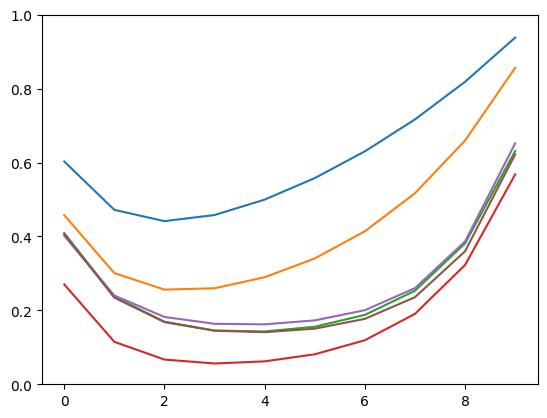

In [6]:
n_subj = 6
n_item = 10
Pm = 0.1
Ps = 0.05
D1m = 0.7
D1s = 0.05
D2m = 1
D2s = 0.2
R1m = 1
R1s = 0.05
R2m = 0.7
R2s = 0.2
param = [n_subj, n_item, Pm, Ps, D1m, D1s, D2m, D2s, R1m, R1s, R2m, R2s]
p_recall = generate(rng, *param)
plt.plot(p_recall.T);
plt.ylim(0, 1)

In [7]:
rng = np.random.default_rng(1)

In [8]:
n_subj = 100
n_item = 12
Pm = 0.1
Ps = 0.05
D1m = 0.7
D1s = 0.05
D2m = 1
D2s = 0.2
R1m = 1
R1s = 0.05
R2m = 0.7
R2s = 0.2
param = [n_subj, n_item, Pm, Ps, D1m, D1s, D2m, D2s, R1m, R1s, R2m, R2s]
p_recall = generate(rng, *param)
recall = (rng.random(p_recall.shape) < p_recall).astype(int)
np.savetxt("gen_recall.txt", recall, fmt="%d")

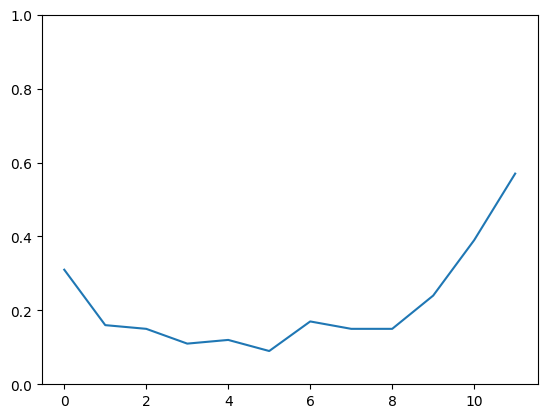

In [9]:
plt.plot(np.mean(recall, 0))
plt.ylim(0, 1);

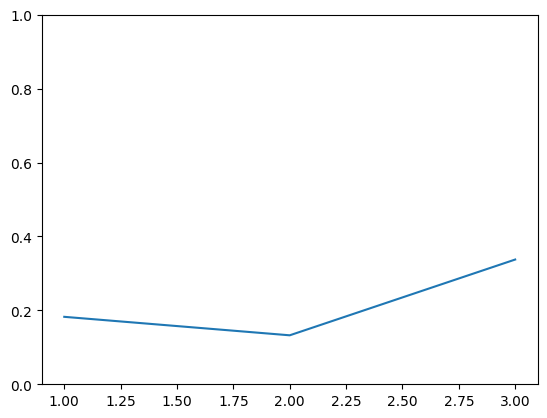

In [10]:
rm = np.mean(recall, 0)
rm1 = np.mean(rm[:4])
rm2 = np.mean(rm[4:8])
rm3 = np.mean(rm[8:])
plt.plot([1, 2, 3], [rm1, rm2, rm3])
plt.ylim(0, 1);

In [11]:
rng = np.random.default_rng(1)

In [12]:
participant_id = np.arange(1, n_subj + 1)
participant_age = rng.normal(loc=25, scale=5, size=100)
info = np.vstack([participant_id, participant_age]).T
np.savetxt("participants.txt", info, fmt="%d")